# Отборочное задание

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('data/train.tar.gz', compression='gzip', header=0, sep=';', quotechar='"', nrows=10000)

In [45]:
df.head(5)

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379278800,0,2733540231,3500392421,4454,15573,11,995,2,176,15,671,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,32,0,0,106
1,1379278800,0,1964843810,1232327635,2081,2547,11,995,2,361,15,802,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,0,0,106
2,1379278800,0,660357674,2066571765,602,29581,29,995,0,468,15,758,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,119,0,0,103
3,1379278800,0,2962648192,2373358995,4018,36969,30,995,2,8,15,67,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,0,0,0,106
4,1379278800,0,1822613420,446973819,2081,23457,35,995,0,452,15,821,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,5,0,0,106


In [46]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['CG1', 'CG2', 'CG3']
['train.csv', 'label', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'l1', 'l2', 'C11', 'C12']


In [55]:
df_category = df[categorical_columns]
df_numerical = df[numerical_columns]

In [56]:
df_category

,CG1,CG2,CG3
0,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN
1,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN
2,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN
3,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN
4,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN
...,...,...,...
9995,"385,373,431,99,154,155,76,412,122,139,333,332,...",NaN,NaN
9996,"273,205,384,382,375,93,98,96,88,216,224,183,50...",NaN,NaN
9997,"273,170,169,205,204,174,176,380,384,375,92,96,...",NaN,46594
9998,"273,205,242,380,379,382,375,96,220,222,216,224...",NaN,NaN


In [57]:
df_category_= {}

In [58]:
for c in categorical_columns:
    df_category_[c]  = df_category[c].str.split(',',expand=True)

In [81]:
for c in categorical_columns:
     df_category_[c].columns = [c + str(i) for i in range(1, df_category_[c].columns.stop+1)]

,CG31,CG32,CG33,CG34,CG35,CG36,CG37,CG38,CG39,CG310,CG311,CG312,CG313,CG314,CG315,CG316,CG317,CG318,CG319,CG320
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,46594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
for c in categorical_columns:
    df_category_[c]  = df_category_[c].fillna(0) 

In [86]:
data = pd.concat((df_numerical, df_category_['CG1'], df_category_['CG2'], df_category_['CG3']), axis=1)

In [90]:
X = data.drop(('label'), axis=1)
y = data['label']

In [91]:
X

,train.csv,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,CG311,CG312,CG313,CG314,CG315,CG316,CG317,CG318,CG319,CG320
0,1379278800,2733540231,3500392421,4454,15573,11,995,2,176,15,...,0,0,0,0,0,0,0,0,0,0
1,1379278800,1964843810,1232327635,2081,2547,11,995,2,361,15,...,0,0,0,0,0,0,0,0,0,0
2,1379278800,660357674,2066571765,602,29581,29,995,0,468,15,...,0,0,0,0,0,0,0,0,0,0
3,1379278800,2962648192,2373358995,4018,36969,30,995,2,8,15,...,0,0,0,0,0,0,0,0,0,0
4,1379278800,1822613420,446973819,2081,23457,35,995,0,452,15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1379278881,3002354239,2219305442,400,31673,13,995,2,293,15,...,0,0,0,0,0,0,0,0,0,0
9996,1379278881,1446415135,1530013282,5295,13017,11,995,0,176,15,...,0,0,0,0,0,0,0,0,0,0
9997,1379278881,1039592267,3761196692,270,4302,0,3905,2,147,80,...,0,0,0,0,0,0,0,0,0,0
9998,1379278881,2485311061,1569139679,2360,27275,88,995,0,177,15,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X = X.apply(pd.to_numeric)

In [100]:
X = (X - X.mean()) / X.std()

In [101]:
X

,train.csv,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,CG311,CG312,CG313,CG314,CG315,CG316,CG317,CG318,CG319,CG320
0,-1.875309,0.467753,1.118360,0.905066,-0.492375,-0.611529,-0.281989,1.057451,-1.217547,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
1,-1.875309,-0.156825,-0.722325,-0.337574,-1.739944,-0.611529,-0.281989,1.057451,0.632596,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
2,-1.875309,-1.216740,-0.045281,-1.112064,0.849246,0.043096,-0.281989,-0.948907,1.702679,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
3,-1.875309,0.653907,0.203697,0.676751,1.556834,0.079464,-0.281989,1.057451,-2.897678,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
4,-1.875309,-0.272389,-1.359692,-0.337574,0.262718,0.261305,-0.281989,-0.948907,1.542667,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.701654,0.686168,0.078673,-1.217843,1.049608,-0.538793,-0.281989,1.057451,-0.047457,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
9996,1.701654,-0.578056,-0.480734,1.345462,-0.737176,-0.611529,-0.281989,-0.948907,-1.217547,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
9997,1.701654,-0.908606,1.330020,-1.285919,-1.571858,-1.011578,4.155480,1.057451,-1.507570,3.896968,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937
9998,1.701654,0.266063,-0.448980,-0.191474,0.628388,2.188813,-0.281989,-0.948907,-1.207547,-0.283548,...,-0.212478,-0.208331,-0.203986,-0.203101,-0.20231,-0.195471,-0.196489,-0.191945,-0.187975,-0.188937


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

7000 3000


## k NN – метод ближайших соседей

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.003 0.0006666666666666666


In [106]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

c:\users\user\pycharmprojects\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.0030000000000000027 3


# SVC – машина опорных векторов

In [114]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

c:\users\user\pycharmprojects\mlbootcamp_sample\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.003 0.0006666666666666666


Радиальное ядро SVC(kernel='rbf')

In [115]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

c:\users\user\pycharmprojects\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV error    =  0.0030000000000000027
best C      =  0.001
best gamma  =  1e-05


In [116]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.003 0.0006666666666666666


# Random Forest – случайный лес

In [122]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=5, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0008571428571428571 0.0016666666666666668


In [118]:
from sklearn.model_selection import GridSearchCV
n_estimators_array = [1, 5, 10, 50, 75, 100, 150, 200, 300]
rf = ensemble.RandomForestClassifier(random_state=11)
grid = GridSearchCV(rf, param_grid={'n_estimators': n_estimators_array})
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_estimators = grid.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

c:\users\user\pycharmprojects\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.0040000000000000036 10


## Отбор признаков (Feature Selection) с помощью алгоритма случайного леса

In [125]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
print(indices)

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

[  0  69   5  50  55   3 125   4  21  32 111  45  52  16  11 117   1  34
 135  43  47   8  53 122  31   2  30  24  14  78  56  27  10 131 134  48
  62  57  23 108  44  51  22 107  15   9 121 118 130  20  58  26  36  25
  70 127  18  12  29  66  61  65  46 133 123 114 124  40 115  74  28 119
  77  39  13  35  49  33  42  17  19  41  37   6   7  38 136  54 105  95
  96  97  98  99 100 101 102 103 104 106  59 109 110 112 113 116 120 126
 128 129 132  94  93  92  91  60  63  64  67  71  72  73  75  76  79  80
  81  82  83  84  85  86  87  88  89  90  68]
Feature importances:
 1. feature 'train.csv' (0.0815)
 2. feature 'CG155' (0.0497)
 3. feature 'C5   ' (0.0471)
 4. feature 'CG136' (0.0435)
 5. feature 'CG141' (0.0368)
 6. feature 'C3   ' (0.0353)
 7. feature 'CG39 ' (0.0351)
 8. feature 'C4   ' (0.0341)
 9. feature 'CG17 ' (0.0283)
10. feature 'CG118' (0.0275)
11. feature 'CG25 ' (0.0274)
12. feature 'CG131' (0.0267)
13. feature 'CG138' (0.0245)
14. feature 'CG12 ' (0.0239)
15. feature 

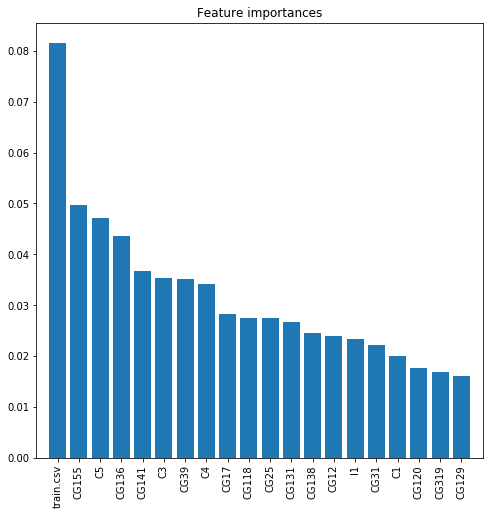

In [126]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [127]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['train.csv', 'CG155', 'C5', 'CG136', 'CG141', 'C3', 'CG39', 'C4'], dtype='object')


# Оценка тестовой выборки

In [155]:
df = pd.read_csv('data/test-data.tar.gz', compression='gzip', header=0, sep=';', quotechar='"')

In [156]:
df.head()

,test.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379538000,-1,4210358866,3196051971,3336,2094,22,995,0,361,15,566,"176,213,220,222,224,47,422,103,419,74,3,235,23...",NaN,NaN,0,0,0,103
1,1379538000,-1,2248128334,3994996972,393,16232,52,995,2,8,15,821,"379,384,98,96,215,224,186,188,183,184,49,50,47...","17179,3883,20334,20333,25423,5318,10989,8668,2...",NaN,6,0,0,104
2,1379538000,-1,2323433900,1100964395,4454,34157,11,995,2,361,15,672,"243,380,269,420,363,31,18,214,331,60,58,306,19...",NaN,NaN,48,0,0,106
3,1379538000,-1,3430094722,1690426382,5919,6384,25,2658,0,390,22,722,"448,277,276,275,99,154,155,76,412,139,333,332,...","22337,2002","43074,43841,45509,45500,33701,54846,38344,1159...",2,0,1,106
4,1379538000,-1,3531271529,3678868632,1169,26182,30,995,0,94,15,1131,"273,170,205,204,174,173,248,384,382,381,92,97,...",16129,NaN,23,0,0,104


In [157]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['CG1', 'CG2', 'CG3']
['test.csv', 'label', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'l1', 'l2', 'C11', 'C12']


In [158]:
df_category = df[categorical_columns]
df_numerical = df[numerical_columns]

In [159]:
df_numerical

,test.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,l1,l2,C11,C12
0,1379538000,-1,4210358866,3196051971,3336,2094,22,995,0,361,15,566,0,0,0,103
1,1379538000,-1,2248128334,3994996972,393,16232,52,995,2,8,15,821,6,0,0,104
2,1379538000,-1,2323433900,1100964395,4454,34157,11,995,2,361,15,672,48,0,0,106
3,1379538000,-1,3430094722,1690426382,5919,6384,25,2658,0,390,22,722,2,0,1,106
4,1379538000,-1,3531271529,3678868632,1169,26182,30,995,0,94,15,1131,23,0,0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317216,1379567711,-1,4013355675,1488151843,4454,7162,11,995,2,176,15,751,116,0,0,106
1317217,1379567711,-1,1003726858,3791860685,3347,4826,20,995,2,313,15,26,0,0,0,105
1317218,1379567711,-1,2111368674,446973819,2081,23457,35,995,0,468,15,1387,69,0,0,106
1317219,1379567711,-1,2188853584,2616790059,2986,10918,30,995,0,468,15,821,10,0,0,105


In [160]:
df_category_= {}
for c in categorical_columns:
    df_category_[c]  = df_category[c].str.split(',',expand=True)
for c in categorical_columns:
     df_category_[c].columns = [c + str(i) for i in range(1, df_category_[c].columns.stop+1)]
for c in categorical_columns:
    df_category_[c]  = df_category_[c].fillna(0) 
data = pd.concat((df_numerical, df_category_['CG1'], df_category_['CG2'], df_category_['CG3']), axis=1)

In [161]:
df_category_['CG1']['CG198'].describe()111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 

count     1317221
unique         12
top             0
freq      1317180
Name: CG198, dtype: int64

In [143]:
X = data.drop(('label'), axis=1)
y = data['label']

In [145]:
X

,test.csv,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,CG311,CG312,CG313,CG314,CG315,CG316,CG317,CG318,CG319,CG320
0,1379538000,4210358866,3196051971,3336,2094,22,995,0,361,15,...,0,0,0,0,0,0,0,0,0,0
1,1379538000,2248128334,3994996972,393,16232,52,995,2,8,15,...,0,0,0,0,0,0,0,0,0,0
2,1379538000,2323433900,1100964395,4454,34157,11,995,2,361,15,...,0,0,0,0,0,0,0,0,0,0
3,1379538000,3430094722,1690426382,5919,6384,25,2658,0,390,22,...,16378,51011,6256,31679,21958,49900,55070,56117,39406,18577
4,1379538000,3531271529,3678868632,1169,26182,30,995,0,94,15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1379538065,2960357226,3949558511,3776,3639,14,995,2,251,15,...,0,0,0,0,0,0,0,0,0,0
9996,1379538065,424461351,1626640956,5122,32483,10,995,2,293,15,...,0,0,0,0,0,0,0,0,0,0
9997,1379538065,96855751,3481236633,2524,37029,10,995,2,293,15,...,0,0,0,0,0,0,0,0,0,0
9998,1379538065,339219710,3500392421,4454,15573,11,995,2,176,15,...,0,0,0,0,0,0,0,0,0,0


In [146]:
X = X.apply(pd.to_numeric)
X = (X - X.mean()) / X.std()

In [148]:
svc.predict(X)

ValueError: X.shape[1] = 144 should be equal to 137, the number of features at training time